In [1]:
import json
import random
import sys

import numpy as np

sys.path.insert(1, '../../src')

from ce.algorithms.greedy_heuristics import random_solution
from ce.algorithms.local_search import multiple_start_local_search, large_scale_search, two_edges_neighborhood
from ce.tsp import create_tsp, TSP
from ce.utils.experiments import experiment, quality_plots

# Large scale neighborhood search

**Nina Zukowska 148278, Antoni Solarski 148270**

In [2]:
problem_instance_A_path = '../../data/TSPA.csv'
problem_instance_B_path = '../../data/TSPB.csv'
problem_instance_C_path = '../../data/TSPC.csv'
problem_instance_D_path = '../../data/TSPD.csv'

In [3]:
tspa = create_tsp(problem_instance_A_path)
tspb = create_tsp(problem_instance_B_path)
tspc = create_tsp(problem_instance_C_path)
tspd = create_tsp(problem_instance_D_path)

## Algorithms

---

**Break**: simply remove 30% of nodes (consecutive).

**Repair**: use a weighted regret (with k = 0.5) greedy cycle.

```python
def break_solution(solution: List[int], break_factor=0.3):
    break_length = int(break_factor * len(solution))
    start_index = np.random.randint(1, len(solution) - break_length)
    end_index = start_index + break_length

    return solution[:start_index] + solution[end_index:]
```

```python
def repair_solution(solution: List[int], tsp: TSP):
    while len(solution) < tsp.get_desired_solution_length():
        solution = extend_cycle(solution, tsp, 0.5)

    return solution
```

```python
def large_scale_search(tsp: TSP, init_solution: List[int], time_limit: float, neighborhood_fn, with_ls: bool):
    best_solution, _ = steepest_local_search_cache(tsp, init_solution, neighborhood_fn)
    best_solution_cost, iterations = tsp.get_solution_cost(best_solution), 0

    start_time = time.time()
    while time.time() - start_time < time_limit:
        iterations += 1
        new_solution = break_solution(best_solution)
        new_solution = repair_solution(new_solution, tsp)
        if with_ls:
            new_solution, _ = steepest_local_search_cache(tsp, new_solution, neighborhood_fn)

        new_solution_cost = tsp.get_solution_cost(new_solution)
        if new_solution_cost < best_solution_cost:
            best_solution = new_solution
            best_solution_cost = new_solution_cost

    return best_solution, iterations
```

---

## Experiments

In [4]:
n_runs = 20
time_limit = 90.0
experiment_names = ["large scale (without ls)", "large scale (with ls)"]
previous_experiments = ["multiple start local search", "iterated local search"]

def without_ls_experiment_provider(tsp: TSP, random_inits, time_limit):
    return lambda x: large_scale_search(tsp, random_inits[x], time_limit, two_edges_neighborhood, False)

def with_ls_experiment_provider(tsp: TSP, random_inits, time_limit):
    return lambda x: large_scale_search(tsp, random_inits[x], time_limit, two_edges_neighborhood, True)

---

### Instance C

In [5]:
random.seed(13)
np.random.seed(13)
random_inits_c = [random_solution(tspc) for i in range(n_runs)]

#### Large scale search without local search

In [6]:
%%time
random.seed(13)
np.random.seed(13)

print("**************************************************************************************************************************")
without_ls_costs_c, without_ls_best_solution_c = experiment(n_runs, without_ls_experiment_provider(tspc, random_inits_c, time_limit), tspc.get_solution_cost)
print("**************************************************************************************************************************")

**************************************************************************************************************************
cost: 48488.7, (47855 - 50241)	|	iter: 602.0, (476 - 627)	|	time: 90.6s, (90.5s - 91.5s)
**************************************************************************************************************************
CPU times: total: 30min 14s
Wall time: 30min 12s


#### Large scale search with local search

In [7]:
%%time
random.seed(13)
np.random.seed(13)

print("**************************************************************************************************************************")
with_ls_costs_c, with_ls_best_solution_c = experiment(n_runs, with_ls_experiment_provider(tspc, random_inits_c, time_limit), tspc.get_solution_cost)
print("**************************************************************************************************************************")

**************************************************************************************************************************
cost: 48181.8, (47259 - 49730)	|	iter: 533.5, (520 - 542)	|	time: 90.6s, (90.4s - 90.7s)
**************************************************************************************************************************
CPU times: total: 30min 11s
Wall time: 30min 11s


In [8]:
results_list_c, best_solutions_c = [without_ls_costs_c, with_ls_costs_c], [without_ls_best_solution_c, with_ls_best_solution_c]

In [9]:
with open('../report_6/results_c.json', 'r', encoding='utf-8') as f:
    previous_results_list_c = json.load(f)
with open('../report_6/best_solutions_c.json', 'r', encoding='utf-8') as f:
    previous_best_solutions_c = json.load(f)

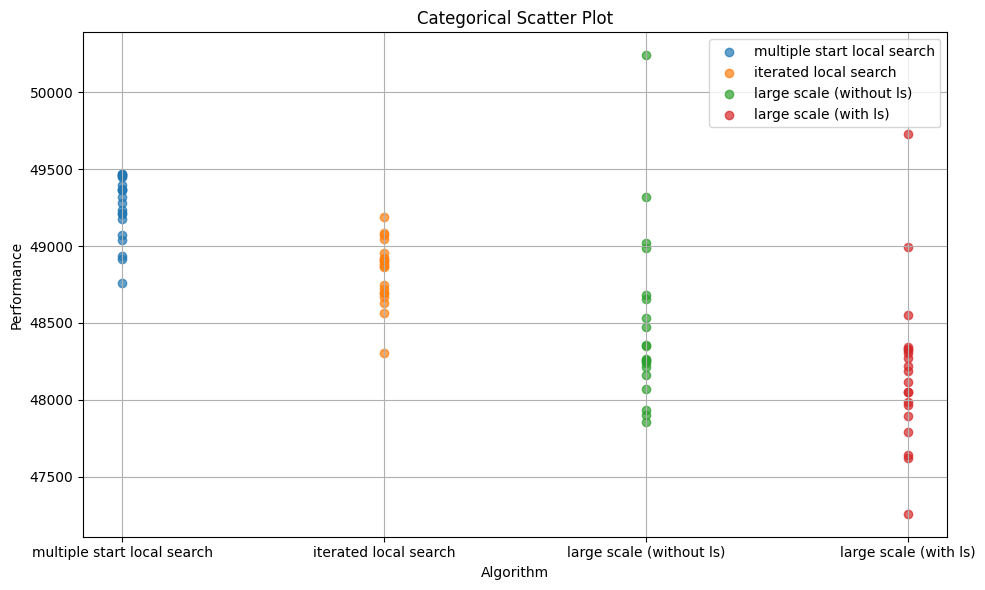

In [10]:
quality_plots(previous_results_list_c + results_list_c, categories=previous_experiments + experiment_names)

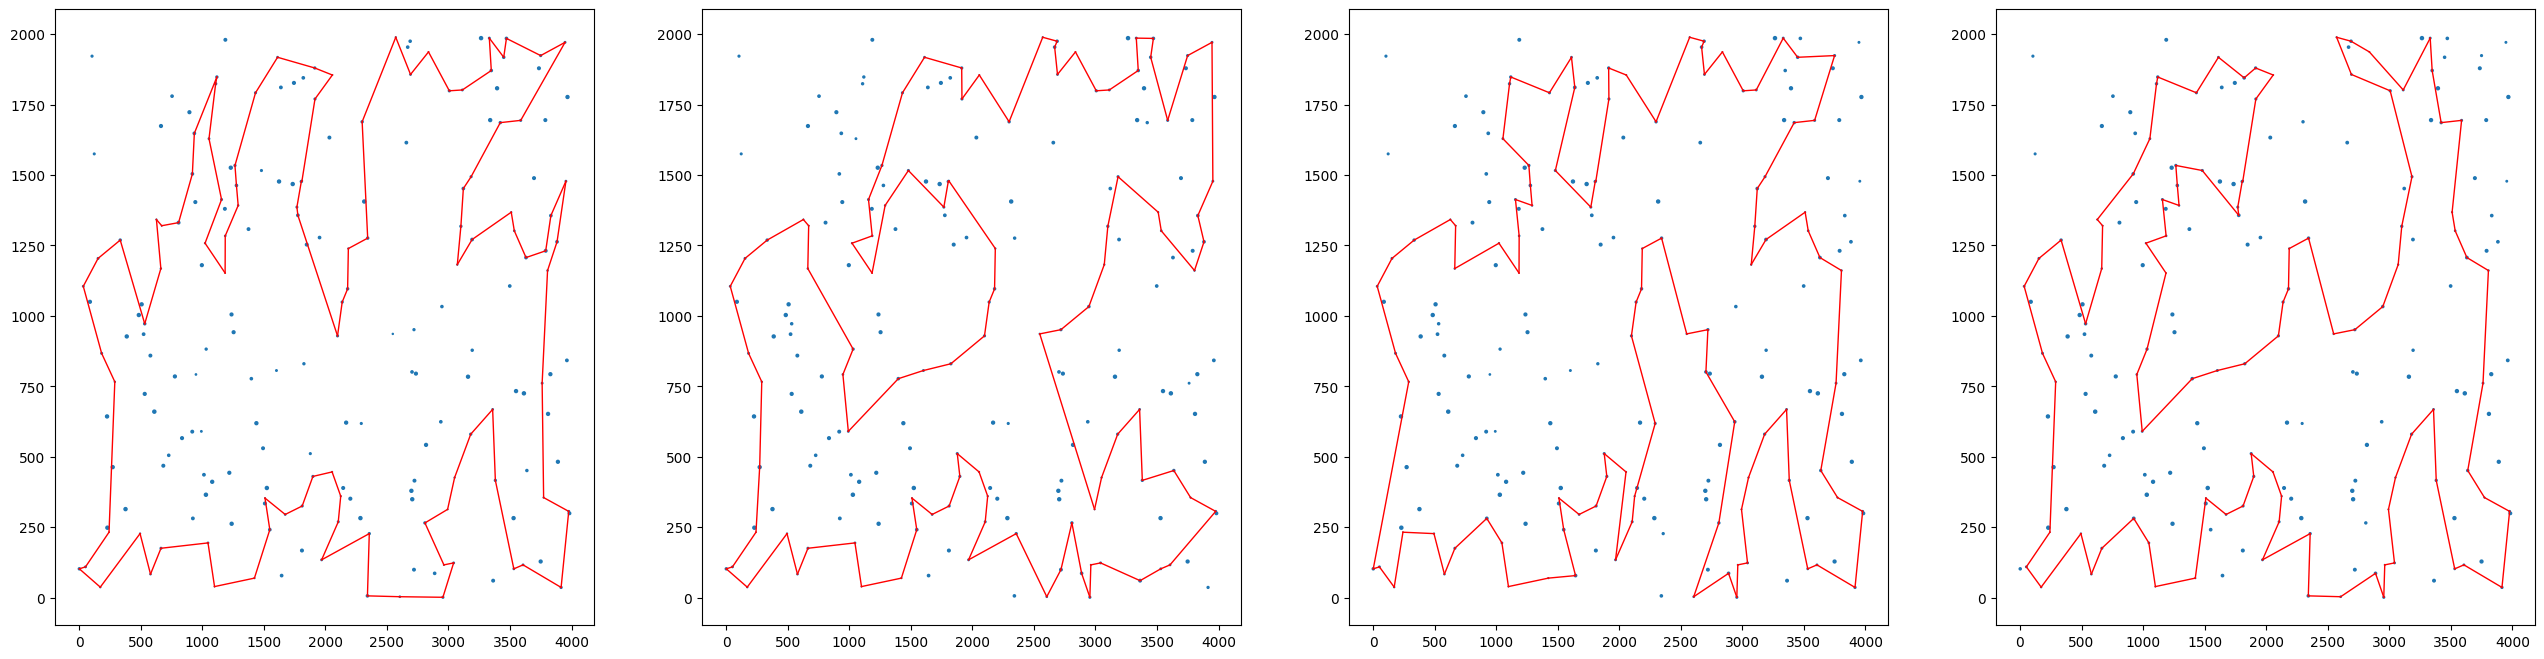

In [11]:
tspc.plot(previous_best_solutions_c + best_solutions_c)

---

### Instance D

In [12]:
random.seed(13)
np.random.seed(13)
random_inits_d = [random_solution(tspd) for i in range(n_runs)]

#### Large scale search without local search

In [13]:
%%time
random.seed(13)
np.random.seed(13)

print("**************************************************************************************************************************")
without_ls_costs_d, without_ls_best_solution_d = experiment(n_runs, without_ls_experiment_provider(tspd, random_inits_d, time_limit), tspd.get_solution_cost)
print("**************************************************************************************************************************")

**************************************************************************************************************************
cost: 45568.4, (44394 - 47511)	|	iter: 629.9, (616 - 636)	|	time: 90.6s, (90.4s - 90.7s)
**************************************************************************************************************************
CPU times: total: 30min 11s
Wall time: 30min 11s


#### Large scale search with local search

In [14]:
%%time
random.seed(13)
np.random.seed(13)

print("**************************************************************************************************************************")
with_ls_costs_d, with_ls_best_solution_d = experiment(n_runs, with_ls_experiment_provider(tspd, random_inits_d, time_limit), tspd.get_solution_cost)
print("**************************************************************************************************************************")

**************************************************************************************************************************
cost: 45205.6, (44153 - 46747)	|	iter: 529.9, (503 - 540)	|	time: 90.6s, (90.5s - 90.7s)
**************************************************************************************************************************
CPU times: total: 30min 11s
Wall time: 30min 11s


In [15]:
results_list_d, best_solutions_d = [without_ls_costs_d, with_ls_costs_d], [without_ls_best_solution_d, with_ls_best_solution_d]

In [16]:
with open('../report_6/results_d.json', 'r', encoding='utf-8') as f:
    previous_results_list_d = json.load(f)
with open('../report_6/best_solutions_d.json', 'r', encoding='utf-8') as f:
    previous_best_solutions_d = json.load(f)

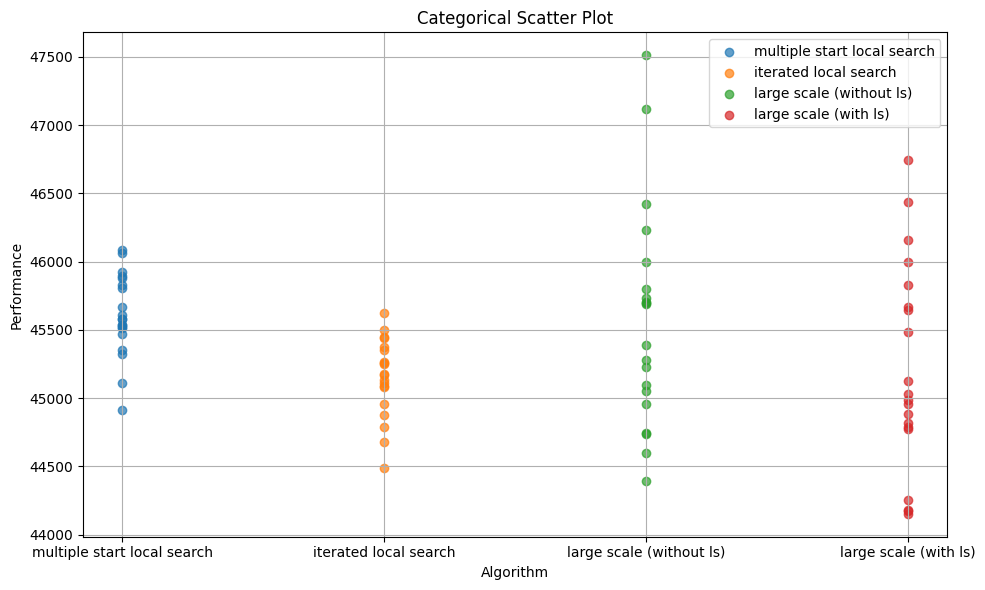

In [17]:
quality_plots(previous_results_list_d + results_list_d, categories=previous_experiments + experiment_names)

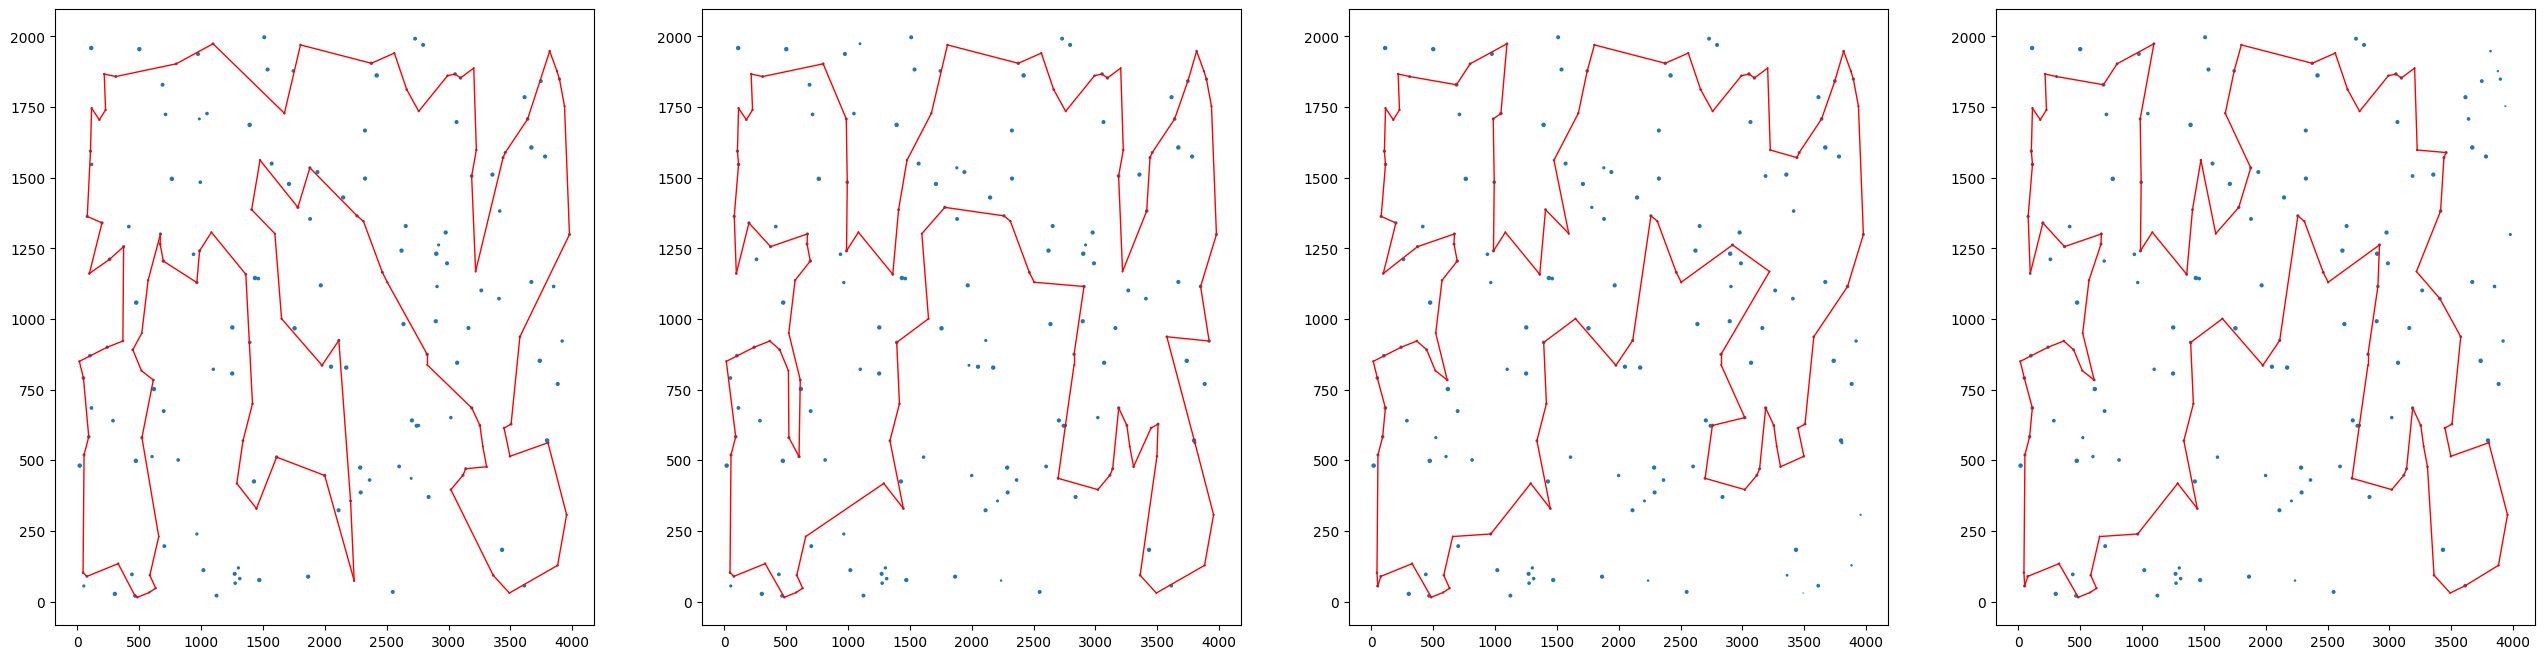

In [18]:
tspd.plot(previous_best_solutions_d + best_solutions_d)

---

In [19]:
with open('results_c.json', 'w', encoding='utf-8') as f:
    json.dump(results_list_c, f, ensure_ascii=False, indent=4)
with open('best_solutions_c.json', 'w', encoding='utf-8') as f:
    json.dump(best_solutions_c, f, ensure_ascii=False, indent=4)

In [20]:
with open('results_d.json', 'w', encoding='utf-8') as f:
    json.dump(results_list_d, f, ensure_ascii=False, indent=4)
with open('best_solutions_d.json', 'w', encoding='utf-8') as f:
    json.dump(best_solutions_d, f, ensure_ascii=False, indent=4)

## Conclusions

The large-scale search results were more diverse compared to multiple start local search and iterated local search from the last report. However, on average (and considering the best solutions found) large-scale search outperformed MSLS and ILS, especially with local search. This is expected, as local search usage improved the solution found with heuristic (nearest-neighbor heuristic).

The nearest-neighbor heuristic was chosen because of its much smaller time complexity than greedy cycle one, thanks to that large-scale search was able to perform much more "loops" than with the usage of greedy-cycle (in our experiments local search was performing more than 600 iterations without local search and more than 500 with ls not too few - in comparison to 800 iterations done by MSLS).